In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import mean_squared_error

In [2]:
#load the files
normal_data=pd.read_csv('BATADAL_dataset03.csv')
attack_data=pd.read_csv('BATADAL_dataset04.csv')
test_data=pd.read_csv('BATADAL_test_dataset.csv')

#########Preprocessing starts########
#attack data contain some blank spaces that should be removed
attack_data.columns = attack_data.columns.str.strip()

#transform the dates to datatime format
attack_data['DATETIME']=pd.to_datetime(attack_data['DATETIME'])
normal_data['DATETIME']=pd.to_datetime(normal_data['DATETIME'])
test_data['DATETIME']=pd.to_datetime(test_data['DATETIME'])

#set the datetime as the index of the dataframe
attack_data.set_index('DATETIME', inplace=True)
normal_data.set_index('DATETIME', inplace=True)
test_data.set_index('DATETIME', inplace=True)

In [3]:
#########Understanding the data#################

#examine if both datasets contain the same columns 
res = attack_data.columns == normal_data.columns
if False not in res:
    res = True
else: res = False
print("Do both datasets contain the same columns?", res)

('Do both datasets contain the same columns?', True)


In [4]:
#number of signals and their names
print("We have %s columns" %len(attack_data.columns))
#there is one column for the date and one for the label
print("From them %d are signals" %(len(attack_data.columns)-2))

We have 44 columns
From them 42 are signals


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


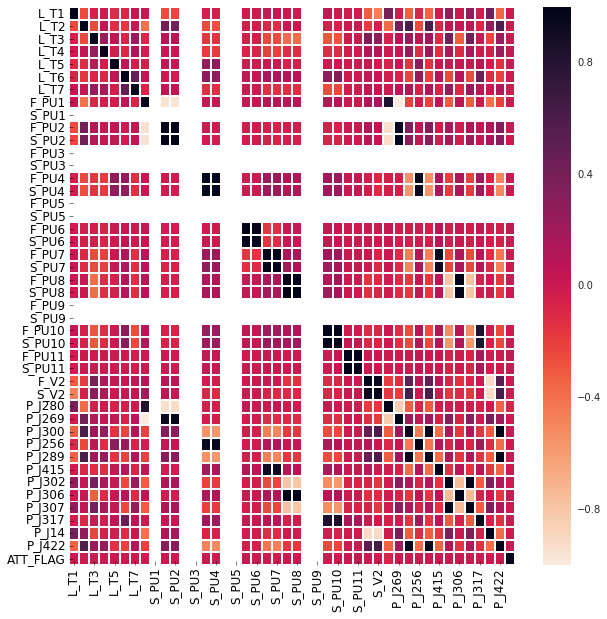

In [5]:
#show correlation of signals
frames = [normal_data, attack_data]
combined = pd.concat(frames)
corr = combined.corr()
#corr = attack.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.set()
cmap = sns.cm.rocket_r
sns.heatmap(corr, linewidth=0.5,cmap = cmap)

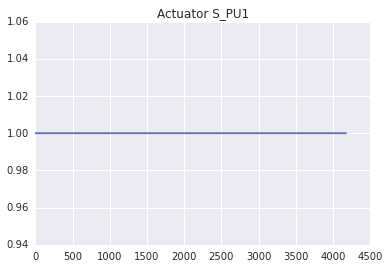

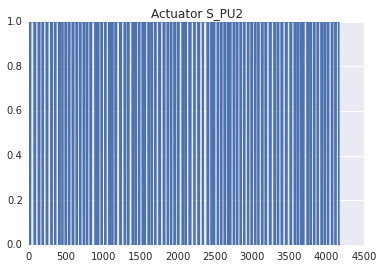

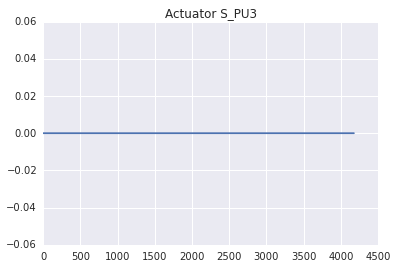

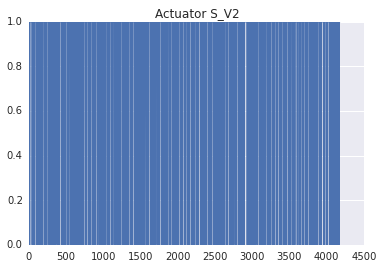

In [6]:
#visualization of actuators
plt.plot(attack_data['S_PU1'])
plt.title('Actuator S_PU1')
plt.figure()
#we notice that even thought actuator S_PU1 is always 1 actuator S_PU2 changes between values 0,1 all the time
plt.plot(attack_data['S_PU2'])
plt.title('Actuator S_PU2')
plt.figure()
plt.title('Actuator S_PU3')
plt.plot(attack_data['S_PU3'])
plt.figure()
#actuator S_V2 changes even more often values that S_PU1
plt.title('Actuator S_V2')
plt.plot(attack_data['S_V2'])



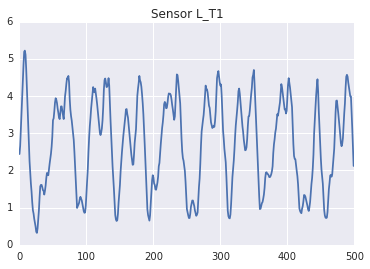

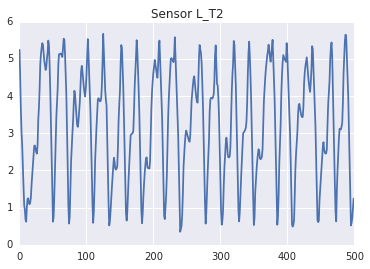

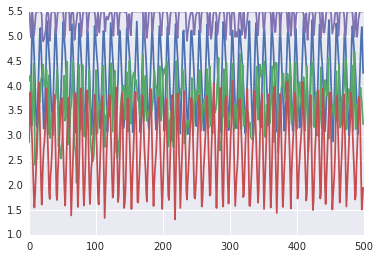

In [7]:
signal_names = normal_data.columns
#visualize some of the signals
plt.title('Sensor %s' %signal_names[0])
attack1=attack_data[signal_names[0]]
plt.plot(attack1[0:500])
plt.figure()
plt.title('Sensor %s' %signal_names[1])
attack2=attack_data[signal_names[1]]
plt.plot(attack2[0:500])
plt.figure()
attack3=attack_data[signal_names[2]]
plt.plot(attack3[0:500])

attack4=attack_data[signal_names[3]]
plt.plot(attack4[0:500])

attack5=attack_data[signal_names[4]]
plt.plot(attack5[0:500])

attack6=attack_data[signal_names[5]]
plt.plot(attack6[0:500])


## Cyclic Behavior

/Library/Python/2.7/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-3000, 3000)

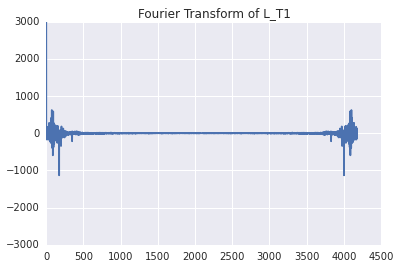

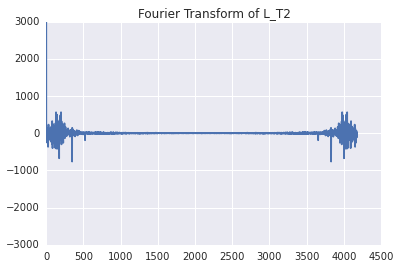

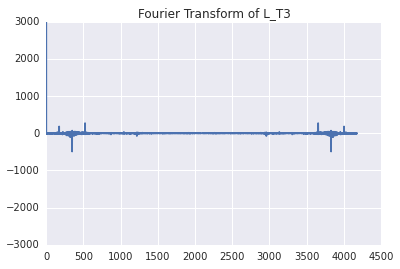

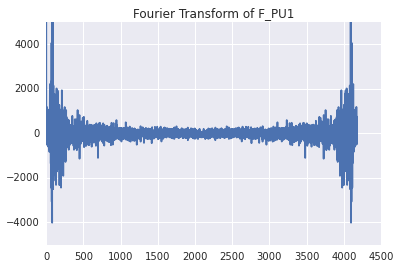

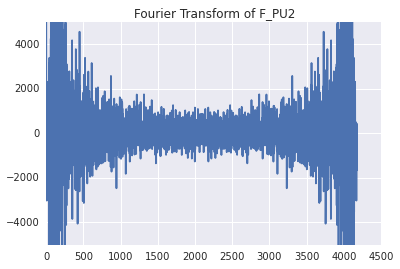

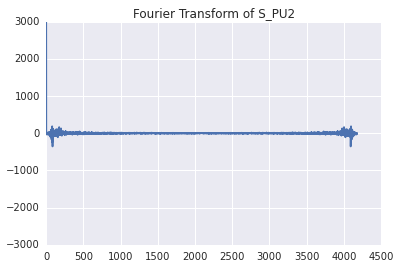

In [8]:
#investigate if the signals have cyclic behavior
#we will use fft for that purpose
plt.plot(np.fft.fft(attack_data[signal_names[0]]))
plt.ylim([-3000, 3000])
plt.title('Fourier Transform of %s' %signal_names[0])
plt.figure()
plt.plot(np.fft.fft(attack_data[signal_names[1]]))
plt.title('Fourier Transform of %s' %signal_names[1])
plt.ylim([-3000, 3000])
plt.figure()
plt.plot(np.fft.fft(attack_data[signal_names[2]]))
plt.title('Fourier Transform of %s' %signal_names[2])
plt.ylim([-3000, 3000])
plt.figure()
plt.plot(np.fft.fft(attack_data[signal_names[7]]))
plt.ylim([-5000, 5000])
plt.title('Fourier Transform of %s' %signal_names[7])
plt.figure()
plt.plot(np.fft.fft(attack_data[signal_names[9]]))
plt.ylim([-5000, 5000])
plt.title('Fourier Transform of %s' %signal_names[9])
plt.figure()
plt.plot(np.fft.fft(attack_data[signal_names[10]]))
plt.title('Fourier Transform of %s' %signal_names[10])
plt.ylim([-3000, 3000])

## Predicting Next Value 

For this question we will use the Persistence model

In [9]:
#select an signal and formulate the t-1 and t+1
values = normal_data['F_PU1']
shifted = pd.concat([values.shift(1), values], axis=1)
shifted.columns = ['t-1', 't+1']
shifted=shifted.iloc[1:]
#define the train set which is the previous values and as label the next value
train=shifted.values
train_data, train_label = train[:,0], train[:,1]
print(train_data)
print(train_label)

[98.9984436  99.09590149 98.42095947 ... 96.44586182 96.92906952
 97.2064743 ]
[99.09590149 98.42095947 97.57517242 ... 96.92906952 97.2064743
 96.10972595]


In [10]:
#define the test test
values_test = attack_data['F_PU1']
shifted_values_test = pd.concat([values_test.shift(1), values_test], axis=1)
shifted_values_test.columns = ['t-1', 't+1']
shifted_values_test=shifted_values_test.iloc[1:]
#again data are the previous value and label the next one
test=shifted_values_test.values
test_data, test_label = test[:,0], test[:,1]

In [11]:
#this model is based on the assumption that the previous point will be really similar to the next one
#it is a simple algorithm, which just returns the same point
def persistence_model(x):
    return x

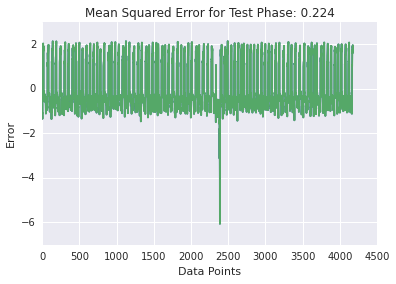

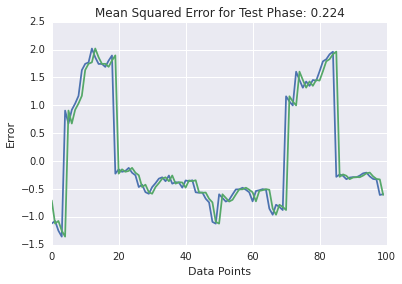

In [12]:
predictions = list()
for x in test_data:
    predicted_label = persistence_model(x)
    predictions.append(predicted_label)
test_label=(test_label-np.mean(test_label))/np.std(test_label)
predictions=(predictions-np.mean(predictions))/np.std(predictions)
error = mean_squared_error(test_label, predictions)

plt.plot(test_label)
plt.plot(predictions)
plt.title('Mean Squared Error for Test Phase: %.3f' % error)
plt.xlabel('Data Points')
plt.ylabel('Error')
plt.figure()
plt.plot(test_label[0:100])
plt.plot(predictions[0:100])
plt.title('Mean Squared Error for Test Phase: %.3f' % error)
plt.xlabel('Data Points')
plt.ylabel('Error')
